**Importing required libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/weatherHistory.csv')

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
df.shape

(86669, 12)

In [8]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [11]:
#it shows unique datatypes of each columns
df.nunique()

Formatted Date              86645
Summary                        26
Precip Type                     2
Temperature (C)              7489
Apparent Temperature (C)     8917
Humidity                       90
Wind Speed (km/h)            2482
Wind Bearing (degrees)        360
Visibility (km)               927
Loud Cover                      1
Pressure (millibars)         4945
Daily Summary                 203
dtype: int64

In [12]:
#it shows total number of non null values
df.count()

Formatted Date              86669
Summary                     86668
Precip Type                 86525
Temperature (C)             86668
Apparent Temperature (C)    86668
Humidity                    86668
Wind Speed (km/h)           86668
Wind Bearing (degrees)      86668
Visibility (km)             86668
Loud Cover                  86668
Pressure (millibars)        86668
Daily Summary               86668
dtype: int64

In [15]:
#it shows all unique values with their counts
df.value_counts()

Formatted Date                 Summary        Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  Daily Summary                                                    
2010-08-02 17:00:00.000 +0200  Partly Cloudy  rain         30.861111         31.361111                0.44      2.2540             325.0                   10.3523          0.0         1014.08               Partly cloudy starting in the afternoon continuing until evening.    2
2010-08-02 10:00:00.000 +0200  Clear          rain         27.688889         28.077778                0.50      0.2254             338.0                   9.9820           0.0         1016.68               Partly cloudy starting in the afternoon continuing until evening.    2
2010-08-02 01:00:00.000 +0200  Clear          rain         18.222222         18.222222                0.97      6.2790             291.0                   14.9086          0.

In [18]:
#it provides basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86669 entries, 0 to 86668
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            86669 non-null  object 
 1   Summary                   86668 non-null  object 
 2   Precip Type               86525 non-null  object 
 3   Temperature (C)           86668 non-null  float64
 4   Apparent Temperature (C)  86668 non-null  float64
 5   Humidity                  86668 non-null  float64
 6   Wind Speed (km/h)         86668 non-null  float64
 7   Wind Bearing (degrees)    86668 non-null  float64
 8   Visibility (km)           86668 non-null  float64
 9   Loud Cover                86668 non-null  float64
 10  Pressure (millibars)      86668 non-null  float64
 11  Daily Summary             86668 non-null  object 
dtypes: float64(8), object(4)
memory usage: 7.9+ MB


In [19]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.0,86668.000000
mean,11.874223,10.792689,0.732243,10.826536,187.893640,10.242641,0.0,1002.340811
std,9.619438,10.763811,0.196697,6.993717,107.949007,4.136320,0.0,120.867741
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.448611,2.227778,0.600000,5.683300,112.000000,8.339800,0.0,1011.800000
50%,11.966667,11.966667,0.780000,9.933700,180.000000,9.982000,0.0,1016.390000
75%,18.827778,18.827778,0.890000,14.151900,290.000000,14.168000,0.0,1021.280000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


**Removing unneccesory Columns**

In [20]:
df = df.drop(['Daily Summary','Wind Bearing (degrees)','Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'], axis = 1)

In [21]:
df.head()

,Formatted Date,Apparent Temperature (C),Humidity,Loud Cover
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,0.0
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,0.0
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,0.0
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,0.0
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,0.0


**checking for Nan values and fill if there**

In [22]:
df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    1
Humidity                    1
Loud Cover                  1
dtype: int64

**Changing 'Formatted Date' to month**

In [23]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)


In [24]:
df = df.set_index('Formatted Date')
data = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()


In [25]:
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2015-08-01 00:00:00+00:00,23.756701,0.659259
2015-09-01 00:00:00+00:00,6.163889,0.740000
2015-10-01 00:00:00+00:00,9.309695,0.866523


**Plotting**

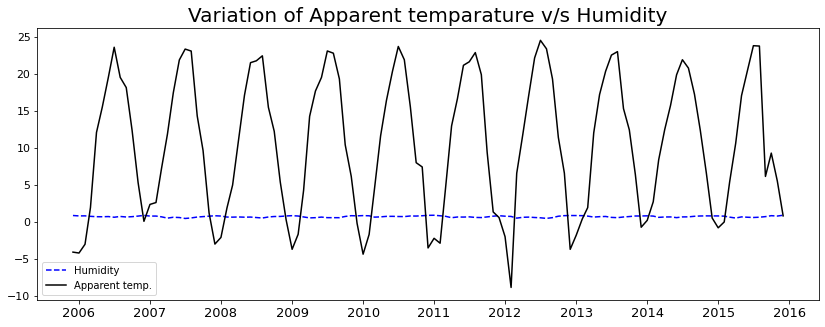

In [26]:
plt.figure(figsize=(14,5));
plt.plot(data['Humidity'], label = 'Humidity', color = 'blue',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'black');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 20);
plt.legend(loc = 0, fontsize = 10);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 11);


In [27]:
april = data[data.index.month==4]


Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

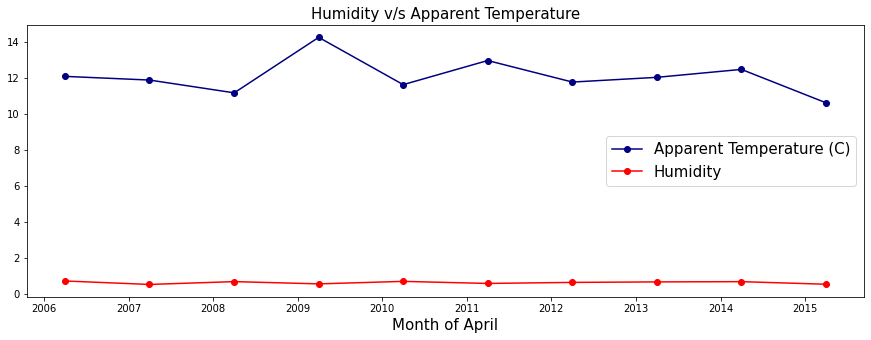

In [28]:
plt.figure(figsize=(15,5))
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'navy');
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'red');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

**Group by**

In [37]:
df = df.reset_index()
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc = True)
df['month'] = df['Formatted Date'].dt.month
df['year'] = df['Formatted Date'].dt.year

In [38]:
df.head()

,index,Formatted Date,Apparent Temperature (C),Humidity,Loud Cover,month,year
0,0,2006-03-31 22:00:00+00:00,7.388889,0.89,0.0,3,2006
1,1,2006-03-31 23:00:00+00:00,7.227778,0.86,0.0,3,2006
2,2,2006-04-01 00:00:00+00:00,9.377778,0.89,0.0,4,2006
3,3,2006-04-01 01:00:00+00:00,5.944444,0.83,0.0,4,2006
4,4,2006-04-01 02:00:00+00:00,6.977778,0.83,0.0,4,2006


In [40]:
data3 = df.groupby(['month','year']).mean()


In [41]:
data3 = data3.drop(['index'],axis = 1)
data3.head()

Apparent Temperature (C)  Humidity  Loud Cover
month year                                                
1     2006                 -4.173708  0.834610         0.0
      2007                  2.387015  0.813495         0.0
      2008                 -2.069907  0.819476         0.0
      2009                 -3.669937  0.867621         0.0
      2010                 -4.329062  0.875914         0.0

In [42]:
data3

Apparent Temperature (C)  Humidity  Loud Cover
month year                                                
1     2006                 -4.173708  0.834610         0.0
      2007                  2.387015  0.813495         0.0
      2008                 -2.069907  0.819476         0.0
      2009                 -3.669937  0.867621         0.0
      2010                 -4.329062  0.875914         0.0
...                              ...       ...         ...
12    2011                  0.618093  0.866223         0.0
      2012                 -3.672909  0.886801         0.0
      2013                 -0.690054  0.823965         0.0
      2014                  0.556586  0.835927         0.0
      2015                  0.842358  0.925532         0.0

[121 rows x 3 columns]

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 10 Text major ticklabel objects>)

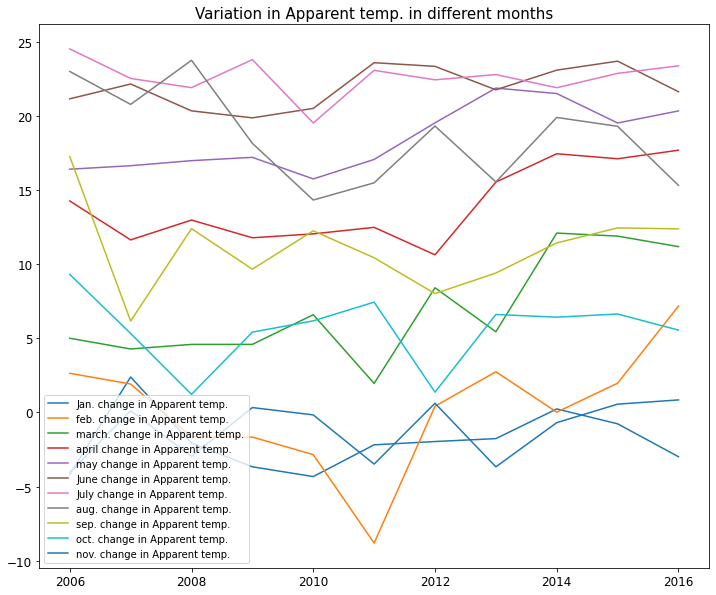

In [45]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Apparent Temperature (C)'][:11].values, label = 'Jan. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][11:22].values, label = 'feb. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][22:33].values, label = 'march. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][33:44].values, label = 'april change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][44:55].values, label = 'may change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][55:66].values, label = 'June change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][66:77].values, label = 'July change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][77:88].values, label = 'aug. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][88:99].values, label = 'sep. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][99:110].values, label = 'oct. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][110:121].values, label = 'nov. change in Apparent temp.')

#plt.xlabel(np.arange(2006,2017), fontsize = 15)
plt.legend(loc = 0)
plt.title('Variation in Apparent temp. in different months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 7 Text major ticklabel objects>)

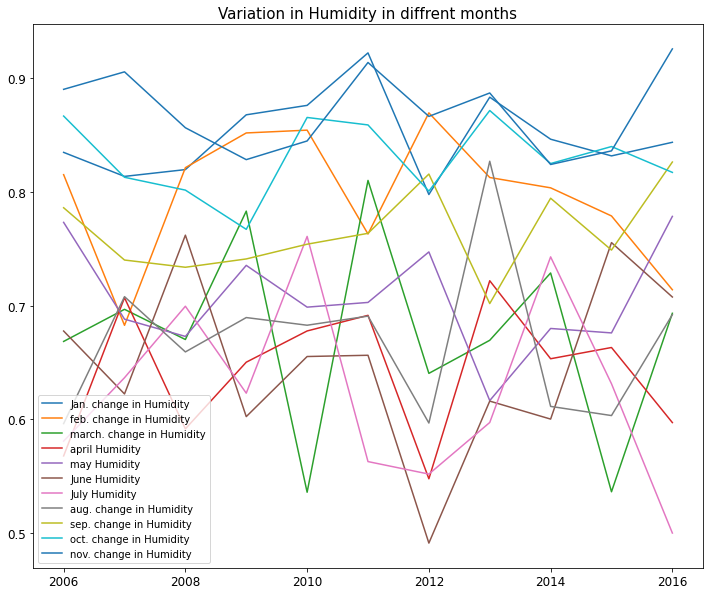

In [47]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][:11].values, label = 'Jan. change in Humidity')
plt.plot(a,data3['Humidity'][11:22].values, label = 'feb. change in Humidity')
plt.plot(a,data3['Humidity'][22:33].values, label = 'march. change in Humidity')
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Humidity')
plt.plot(a,data3['Humidity'][44:55].values, label = 'may Humidity')
plt.plot(a,data3['Humidity'][55:66].values, label = 'June Humidity')
plt.plot(a,data3['Humidity'][66:77].values, label = 'July Humidity')
plt.plot(a,data3['Humidity'][77:88].values, label = 'aug. change in Humidity')
plt.plot(a,data3['Humidity'][88:99].values, label = 'sep. change in Humidity')
plt.plot(a,data3['Humidity'][99:110].values, label = 'oct. change in Humidity')
plt.plot(a,data3['Humidity'][110:121].values, label = 'nov. change in Humidity')

plt.legend(loc = 0)
plt.title('Variation in Humidity in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

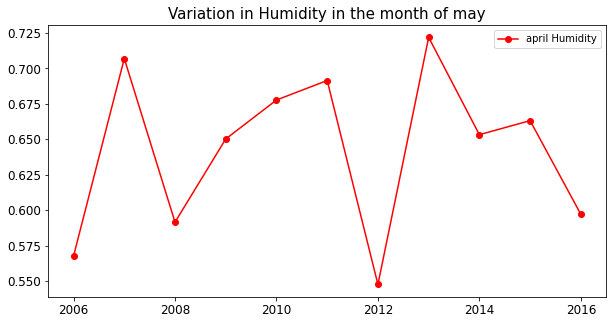

In [48]:
plt.figure(figsize = (10,5))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Humidity',marker = 'o',color = 'red')
plt.title('Variation in Humidity in the month of may',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 0)

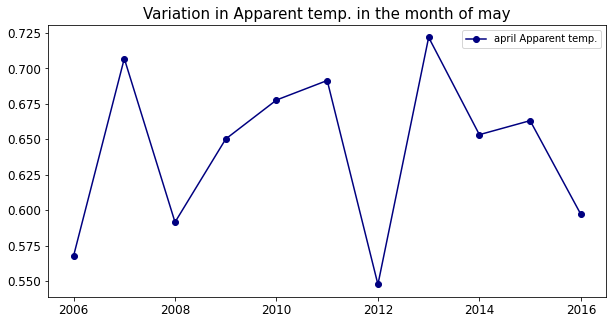

In [49]:
plt.figure(figsize = (10,5))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Apparent temp.',color = 'navy', marker = 'o')
plt.title('Variation in Apparent temp. in the month of may',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 0)